S&P500 Index를 만들어보자

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
listing = pd.read_pickle("Data/spx_constitute_daily.pickle")
stock = pd.read_pickle("Data/allstock.pickle")

In [4]:
table = pd.pivot_table(stock, 
               values="PRC",
               index="date",
               columns="PERMNO")

In [5]:
table

PERMNO,10001,10002,10009,10012,10016,10019,10025,10026,10028,10032,...,93427,93428,93429,93430,93431,93432,93433,93434,93435,93436
date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,8.5625,12.00,16.75000,8.0000,19.6250,9.8125,24.7500,20.75000,6.0000,43.25000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,8.4375,12.50,14.50000,7.3125,18.0000,10.1250,24.7500,19.00000,5.6250,42.09375,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,8.5625,12.00,-15.59375,8.0000,18.6250,9.6250,-24.1875,20.12500,6.0000,42.06250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,8.5000,-12.25,14.87500,7.5000,17.8125,9.6250,23.5000,20.18750,5.8750,42.12500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,8.4375,13.00,-15.25000,7.5625,18.0000,8.7500,25.2500,20.25000,5.6875,42.43750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,153.39999,5.2900,104.56000,...,128.69,NaN,126.18,NaN,NaN,NaN,NaN,1.42,NaN,123.15
2022-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152.09000,5.2300,104.29000,...,129.55,NaN,126.37,NaN,NaN,NaN,NaN,1.40,NaN,109.10
2022-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.78000,5.2600,102.11000,...,126.16,NaN,126.12,NaN,NaN,NaN,NaN,1.45,NaN,112.71


In [27]:
listing_pp = listing.drop_duplicates(["permno"])
code = listing_pp.permno.values

In [28]:
listing_pp

,permno,start,ending,date
0,10225.0,1925-12-31,2014-04-30,2000-01-03
1,14702.0,1995-03-16,2022-12-30,2000-01-03
2,10942.0,1999-10-27,2007-01-31,2000-01-03
3,38578.0,1974-10-17,2004-08-02,2000-01-03
4,42083.0,1971-03-04,2006-11-16,2000-01-03
...,...,...,...,...
366352,86288.0,2022-09-19,2022-12-30,2022-09-19
374891,12476.0,2022-10-12,2022-12-30,2022-10-12
381735,82276.0,2022-11-01,2022-12-30,2022-11-01
397484,23569.0,2022-12-15,2022-12-16,2022-12-15


In [31]:
code = listing_pp.permno.values

# price 데이터프레임 컬럼을 reduce
table_pp = table.loc[:, code]
table_pp.index = pd.to_datetime(table_pp.index)

In [54]:
# 빈 데이터프레임 생성
idx = table_pp.index
col = table_pp.columns

mask = pd.DataFrame(index=idx, 
                    columns=col)

In [56]:
# for 문 돌려서 mask에 1을 채워 넣는다
date_range = mask.index
l_d = listing.date

for date in tqdm(date_range):
    permno = listing.loc[l_d == date].permno.values # daily spx500 기업 코드를 담고있다
    mask.loc[date, permno] = 1

100%|██████████| 5787/5787 [00:46<00:00, 124.85it/s]


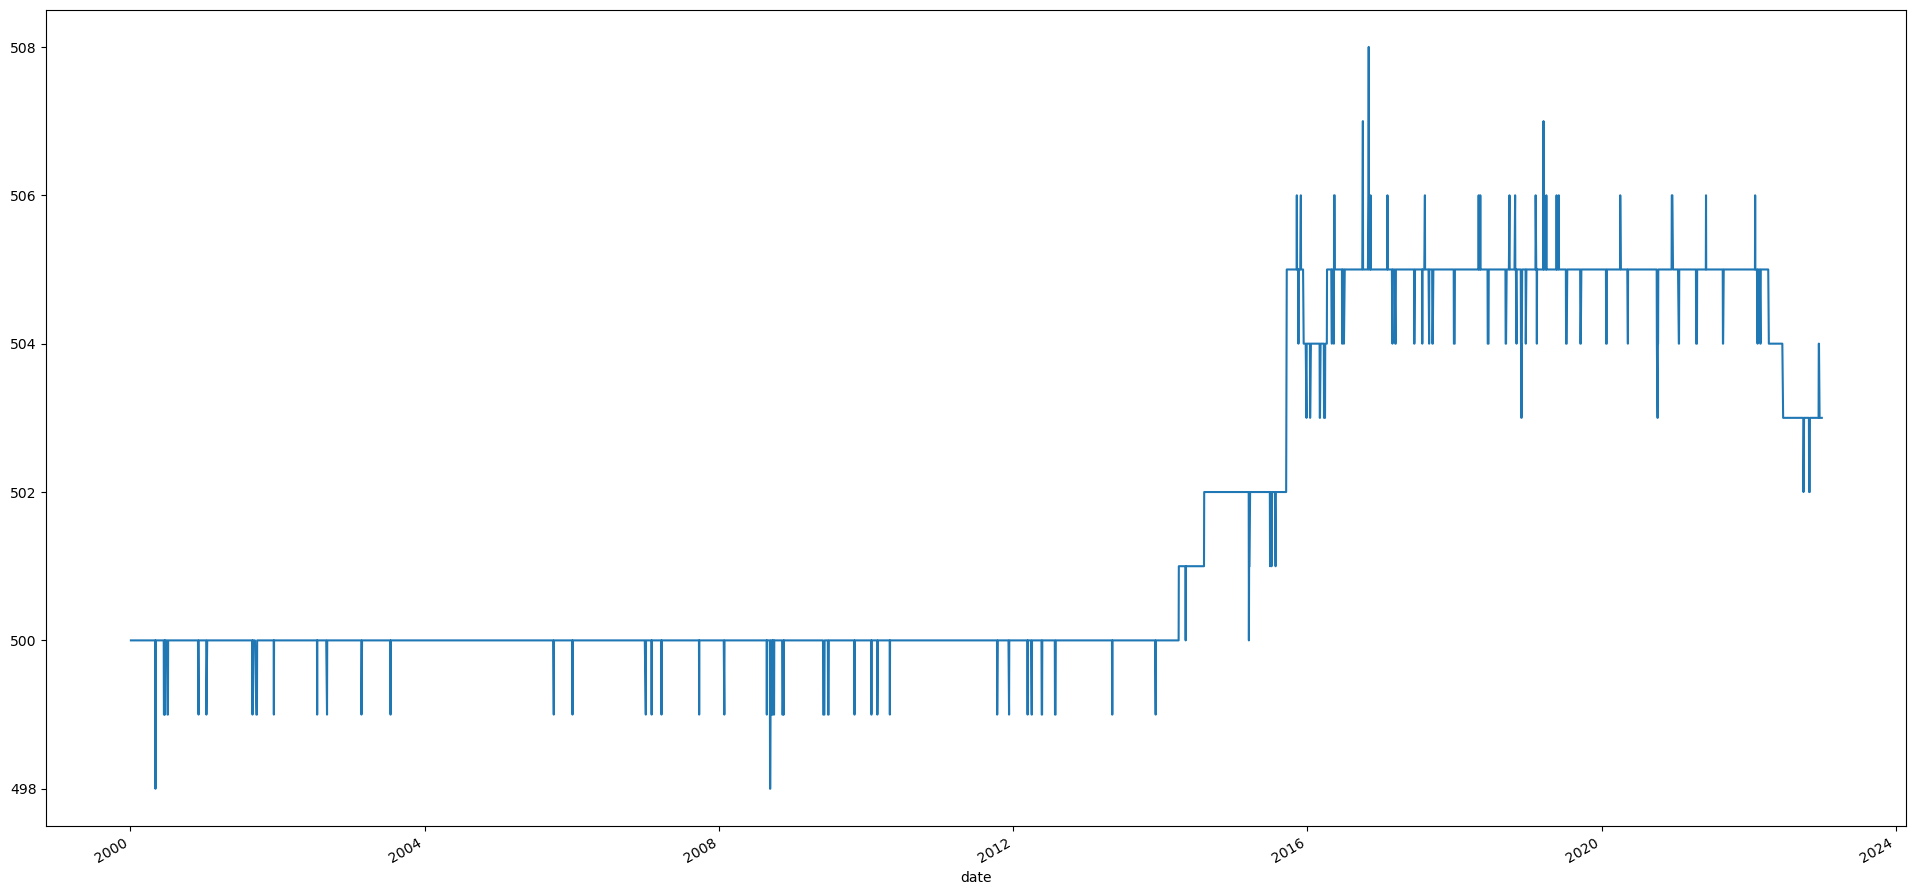

In [60]:
mask.sum(1).plot(figsize=(24,12));

In [59]:
mask.to_pickle("Data/spx_mask.pickle")